# Analysis: By feature and model
### Training on augmented data, Testing on untransformed (reserved) data

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Torch Models

**Notes:**
- OH_all : learning_rate = 0.0005, optimizer = SGD
- OH_mfcc_zcr : learning_rate = 0.0005, optimizer = SGD
- OH_mfcc: learning_rate = 0.0005, optimizer = Adam
- OH_zcr: learning_rate = 0.0005, optimizer = Adam
- OH_energy: learning_rate = 0.0005, optimizer = Adam
- OH_rmse: learning_rate = 0.0005, optimizer = Adam
- TH_all : learning_rate = 0.0005, optimizer = Adam (also tried SGD, but with worse results)
- TH_mfcc_zcr : learning_rate = 0.0005, optimizer = Adam
- TH_mfcc : learning_rate = 0.0005, optimizer = Adam
- TH_zcr : learning_rate = 0.0005, optimizer = Adam
- TH_energy : learning_rate = 0.0005, optimizer = Adam
- TH_rmse : learning_rate = 0.0005, optimizer = Adam
- H3_all : learning_rate = 0.0005, optimizer = Adam
- H3_mfcc_zcr : learning_rate = 0.0005, optimizer = Adam
- H4_all : learning_rate = 0.0005, optimizer = Adam
- H5_all : learning_rate = 0.0005, optimizer = Adam

In [114]:
OH_all = pd.read_csv('../src/predict/predictions/one_hidden_test_pad_all.csv', names=['Pred'])
true_OH_all = pd.read_csv('../src/predict/predictions/true_one_hidden_test_pad_all.csv', names=['True'])

OH_mfcc_zcr = pd.read_csv('../src/predict/predictions/one_hidden_test_pad_mfcc_zcr.csv', names=['Pred'])
true_OH_mfcc_zcr = pd.read_csv('../src/predict/predictions/true_one_hidden_test_pad_mfcc_zcr.csv', names=['True'])

OH_mfcc = pd.read_csv('../src/predict/predictions/one_hidden_test_pad_mfcc.csv', names=['Pred'])
true_OH_mfcc = pd.read_csv('../src/predict/predictions/true_one_hidden_test_pad_mfcc.csv', names=['True'])

OH_zcr = pd.read_csv('../src/predict/predictions/one_hidden_test_pad_zcr.csv', names=['Pred'])
true_OH_zcr = pd.read_csv('../src/predict/predictions/true_one_hidden_test_pad_zcr.csv', names=['True'])

OH_energy = pd.read_csv('../src/predict/predictions/one_hidden_test_pad_energy.csv', names=['Pred'])
true_OH_energy = pd.read_csv('../src/predict/predictions/true_one_hidden_test_pad_energy.csv', names=['True'])

OH_rmse = pd.read_csv('../src/predict/predictions/one_hidden_test_pad_rmse.csv', names=['Pred'])
true_OH_rmse = pd.read_csv('../src/predict/predictions/true_one_hidden_test_pad_rmse.csv', names=['True'])

TH_all = pd.read_csv('../src/predict/predictions/many_hidden_test_pad_all.csv', names=['Pred'])
true_TH_all = pd.read_csv('../src/predict/predictions/true_many_hidden_test_pad_all.csv', names=['True'])

TH_mfcc_zcr = pd.read_csv('../src/predict/predictions/many_hidden_test_pad_mfcc_zcr.csv', names=['Pred'])
true_TH_mfcc_zcr = pd.read_csv('../src/predict/predictions/true_many_hidden_test_pad_mfcc_zcr.csv', names=['True'])

TH_mfcc = pd.read_csv('../src/predict/predictions/many_hidden_test_pad_mfcc.csv', names=['Pred'])
true_TH_mfcc = pd.read_csv('../src/predict/predictions/true_many_hidden_test_pad_mfcc.csv', names=['True'])

TH_zcr = pd.read_csv('../src/predict/predictions/many_hidden_test_pad_zcr.csv', names=['Pred'])
true_TH_zcr = pd.read_csv('../src/predict/predictions/true_many_hidden_test_pad_zcr.csv', names=['True'])

TH_energy = pd.read_csv('../src/predict/predictions/many_hidden_test_pad_energy.csv', names=['Pred'])
true_TH_energy = pd.read_csv('../src/predict/predictions/true_many_hidden_test_pad_energy.csv', names=['True'])

TH_rmse = pd.read_csv('../src/predict/predictions/many_hidden_test_pad_rmse.csv', names=['Pred'])
true_TH_rmse = pd.read_csv('../src/predict/predictions/true_many_hidden_test_pad_rmse.csv', names=['True'])

H3_all = pd.read_csv('../src/predict/predictions/many_hidden_test_pad_all_H3.csv', names=['Pred'])
true_H3_all = pd.read_csv('../src/predict/predictions/true_many_hidden_test_pad_all_H3.csv', names=['True'])

H3_mfcc_zcr = pd.read_csv('../src/predict/predictions/many_hidden_test_pad_mfcc_zcr_H3.csv', names=['Pred'])
true_H3_mfcc_zcr = pd.read_csv('../src/predict/predictions/true_many_hidden_test_pad_mfcc_zcr_H3.csv', names=['True'])

H4_all = pd.read_csv('../src/predict/predictions/many_hidden_test_pad_all_H4.csv', names=['Pred'])
true_H4_all = pd.read_csv('../src/predict/predictions/true_many_hidden_test_pad_all_H4.csv', names=['True'])

H5_all = pd.read_csv('../src/predict/predictions/many_hidden_test_pad_all_H5.csv', names=['Pred'])
true_H5_all = pd.read_csv('../src/predict/predictions/true_many_hidden_test_pad_all_H5.csv', names=['True'])

In [115]:
one_hidden_all_results = pd.concat([OH_all, true_OH_all], axis = 1)
one_hidden_mfcc_zcr_results = pd.concat([OH_mfcc_zcr, true_OH_mfcc_zcr], axis = 1)
one_hidden_mfcc_results = pd.concat([OH_mfcc, true_OH_mfcc], axis = 1)
one_hidden_zcr_results = pd.concat([OH_zcr, true_OH_zcr], axis = 1)
one_hidden_energy_results = pd.concat([OH_energy, true_OH_energy], axis = 1)
one_hidden_rmse_results = pd.concat([OH_rmse, true_OH_rmse], axis = 1)

two_hidden_all_results = pd.concat([TH_all, true_TH_all], axis = 1)
two_hidden_mfcc_zcr_results = pd.concat([TH_mfcc_zcr, true_TH_mfcc_zcr], axis = 1)
two_hidden_mfcc_results = pd.concat([TH_mfcc, true_TH_mfcc], axis = 1)
two_hidden_zcr_results = pd.concat([TH_zcr, true_TH_zcr], axis = 1)
two_hidden_energy_results = pd.concat([TH_energy, true_TH_energy], axis = 1)
two_hidden_rmse_results = pd.concat([TH_rmse, true_TH_rmse], axis = 1)

three_hidden_all_results = pd.concat([H3_all, true_H3_all], axis = 1)
three_hidden_mfcc_zcr_results = pd.concat([H3_mfcc_zcr, true_H3_mfcc_zcr], axis = 1)

four_hidden_all_results = pd.concat([H4_all, true_H4_all], axis = 1)

five_hidden_all_results = pd.concat([H5_all, true_H5_all], axis = 1)

In [117]:
df_list = [one_hidden_all_results, one_hidden_mfcc_zcr_results, one_hidden_mfcc_results, one_hidden_zcr_results, 
           one_hidden_energy_results, one_hidden_rmse_results, two_hidden_all_results, two_hidden_mfcc_zcr_results,
          two_hidden_mfcc_results, two_hidden_zcr_results, two_hidden_energy_results, two_hidden_rmse_results,
          three_hidden_all_results, three_hidden_mfcc_zcr_results, four_hidden_all_results, five_hidden_all_results]
acc_list = []
for df in df_list:
    acc_list.append(accuracy_score(y_true=df['True'], y_pred=df['Pred']))

In [118]:
torch_results = pd.DataFrame(acc_list, columns=['Accuracy'])
torch_results.index = ['1_hidden_all', '1_hidden_mfcc_zcr', '1_hidden_mfcc', '1_hidden_zcr',
                      '1_hidden_energy', '1_hidden_rmse', '2_hidden_all', '2_hidden_mfcc_zcr',
                      '2_hidden_mfcc', '2_hidden_zcr', '2_hidden_energy', '2_hidden_rmse', 
                       '3_hidden_all', '3_hidden_mfcc_zcr', '4_hidden_all', '5_hidden_all']

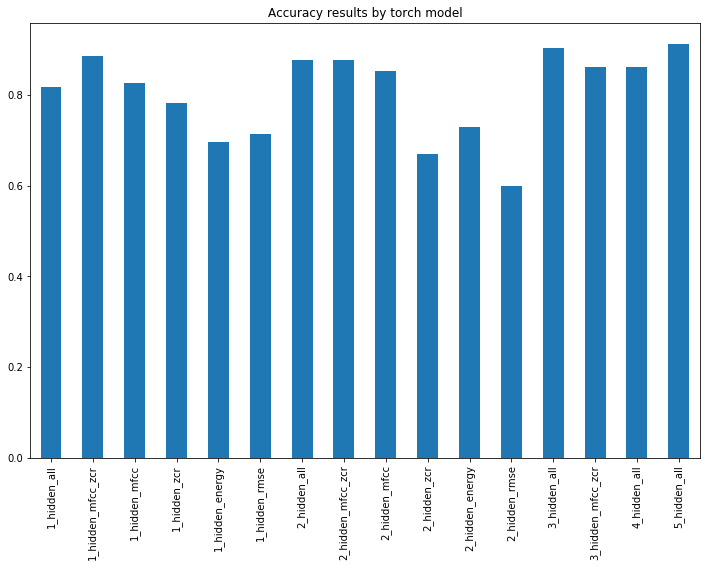

In [119]:
ax = torch_results.plot.bar(legend=False,  figsize=(12,8))
ax.set_title('Accuracy results by torch model');

In [120]:
torch_results

,Accuracy
1_hidden_all,0.817391
1_hidden_mfcc_zcr,0.886957
1_hidden_mfcc,0.826087
1_hidden_zcr,0.782609
1_hidden_energy,0.695652
1_hidden_rmse,0.713043
2_hidden_all,0.878261
2_hidden_mfcc_zcr,0.878261
2_hidden_mfcc,0.852174
2_hidden_zcr,0.669565


**Conclusion:** 
4 hidden layers are too many on the full feature set.... or maybe not!

## Training Errors: Torch models

In [123]:
OH_mfcc = pd.read_csv('../src/train/train_errors/one_hidden_pad_mfcc.csv', names=['1_hidden_mfcc'])
OH_zcr = pd.read_csv('../src/train/train_errors/one_hidden_pad_zcr.csv', names=['1_hidden_zcr'])
OH_energy = pd.read_csv('../src/train/train_errors/one_hidden_pad_energy.csv', names=['1_hidden_energy'])
OH_rmse = pd.read_csv('../src/train/train_errors/one_hidden_pad_rmse.csv', names=['1_hidden_rmse'])
OH_all = pd.read_csv('../src/train/train_errors/one_hidden_pad_all.csv', names=['1_hidden_all'])
OH_mfcc_zcr = pd.read_csv('../src/train/train_errors/one_hidden_pad_mfcc_zcr.csv', names=['1_hidden_mfcc_zcr'])

TH_mfcc = pd.read_csv('../src/train/train_errors/many_hidden_pad_mfcc.csv', names=['2_hidden_mfcc'])
TH_zcr = pd.read_csv('../src/train/train_errors/many_hidden_pad_zcr.csv', names=['2_hidden_zcr'])
TH_energy = pd.read_csv('../src/train/train_errors/many_hidden_pad_energy.csv', names=['2_hidden_energy'])
TH_rmse = pd.read_csv('../src/train/train_errors/many_hidden_pad_rmse.csv', names=['2_hidden_rmse'])
TH_all = pd.read_csv('../src/train/train_errors/many_hidden_pad_all.csv', names=['2_hidden_all'])
TH_mfcc_zcr = pd.read_csv('../src/train/train_errors/many_hidden_pad_mfcc_zcr.csv', names=['2_hidden_mfcc_zcr'])

H3_all = pd.read_csv('../src/train/train_errors/many_hidden_pad_all_H3.csv', names=['3_hidden_all'])
H3_mfcc_zcr = pd.read_csv('../src/train/train_errors/many_hidden_pad_mfcc_zcr_H3.csv', names=['3_hidden_mfcc_zcr'])

H4_all = pd.read_csv('../src/train/train_errors/many_hidden_pad_all_H4.csv', names=['4_hidden_all'])

H5_all = pd.read_csv('../src/train/train_errors/many_hidden_pad_all_H5.csv', names=['5_hidden_all'])

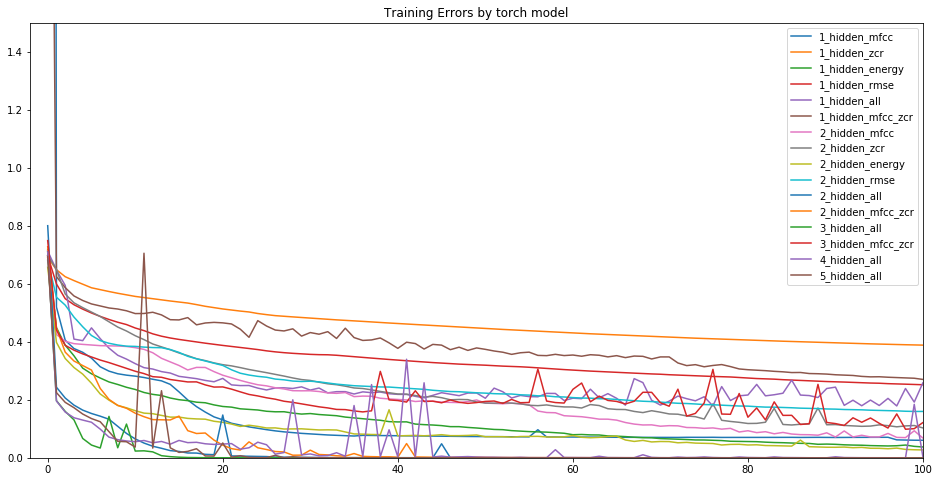

In [132]:
train_errors = pd.concat([OH_mfcc, OH_zcr, OH_energy, OH_rmse, OH_all, OH_mfcc_zcr,
                         TH_mfcc, TH_zcr, TH_energy, TH_rmse, TH_all, TH_mfcc_zcr,
                         H3_all, H3_mfcc_zcr, H4_all, H5_all], axis =1)

OH_errors = pd.concat([OH_mfcc, OH_zcr, OH_energy, OH_rmse, OH_all, OH_mfcc_zcr], axis =1)

TH_errors = pd.concat([TH_mfcc, TH_zcr, TH_energy, TH_rmse, TH_all, TH_mfcc_zcr], axis =1)

H345_errors = pd.concat([H3_all, H3_mfcc_zcr, H4_all, H5_all], axis =1)

ax = train_errors.plot(figsize=(16,8), title='Training Errors by torch model')
ax.set_ylim([0,1.5])
ax.set_xlim([-2,100]);


**Conclusion:** Notice the difference in the models with the SGD optimizer (1_hidden_all and 1_hidden_mfcc_zcr)

## TO DO!
sklearn Models (Logistic Regression, Random Forest)

In [ ]:
SK_stft = pd.read_csv('../../../Source/Data/results_sklearn_augmented_stft.csv')
SK_mfcc = pd.read_csv('../../../Source/Data/results_sklearn_augmented_mfcc.csv')
SK_zcr = pd.read_csv('../../../Source/Data/results_sklearn_augmented_zcr.csv')

SK_stft_bpm = pd.read_csv('../../../Source/Data/results_sklearn_augmented_stft_tempo.csv')
SK_mfcc_bpm = pd.read_csv('../../../Source/Data/results_sklearn_augmented_mfcc_tempo.csv')

In [ ]:
acc_stft_lr = accuracy_score(y_pred=SK_stft['Predict_lr'], y_true=SK_stft['True'])
acc_stft_rf = accuracy_score(y_pred=SK_stft['Predict_rf'], y_true=SK_stft['True'])

acc_stft_bpm_lr = accuracy_score(y_pred=SK_stft_bpm['Predict_lr'], y_true=SK_stft_bpm['True'])
acc_stft_bpm_rf = accuracy_score(y_pred=SK_stft_bpm['Predict_rf'], y_true=SK_stft_bpm['True'])

acc_mfcc_lr = accuracy_score(y_pred=SK_mfcc['Predict_lr'], y_true=SK_mfcc['True'])
acc_mfcc_rf = accuracy_score(y_pred=SK_mfcc['Predict_rf'], y_true=SK_mfcc['True'])

acc_mfcc_bpm_lr = accuracy_score(y_pred=SK_mfcc_bpm['Predict_lr'], y_true=SK_mfcc_bpm['True'])
acc_mfcc_bpm_rf = accuracy_score(y_pred=SK_mfcc_bpm['Predict_rf'], y_true=SK_mfcc_bpm['True'])

acc_zcr_lr = accuracy_score(y_pred=SK_zcr['Predict_lr'], y_true=SK_zcr['True'])
acc_zcr_rf = accuracy_score(y_pred=SK_zcr['Predict_rf'], y_true=SK_zcr['True'])

In [ ]:
sklearn_results = pd.DataFrame([acc_stft_lr,acc_mfcc_lr, acc_stft_bpm_lr, acc_mfcc_bpm_lr, acc_zcr_lr, 
                                acc_stft_rf, acc_mfcc_rf, acc_stft_bpm_rf, acc_mfcc_bpm_rf, acc_zcr_rf],
                               columns=['Accuracy'])
sklearn_results.index = ['LogReg_stft', 'LogReg_mfcc','LogReg_stft_bpm', 'LogReg_mfcc_bpm', 'LogReg_zcr', 
                         'RndFst_stft','RndFst_mfcc', 'RndFst_stft_bpm','RndFst_mfcc_bpm', 'RndFst_zcr']

In [ ]:
ax = sklearn_results.plot.bar(legend=False, figsize=(12,8))
ax.set_title('Accuracy results by OOB model');

**Conclusion:** Using the Short-time Fourier Transform as input feature yields ***worse*** results than Mel-frequency Cepstral Coefficients (num_ceps=20) for both the linear and non-linear sklearn models. In fact, the Random Forest model using MFCCs yields the best result of all the out-of-the-box methods.

In [ ]:
sklearn_results